In [0]:
import numpy as np
from keras.datasets import reuters
np_load_old = np.load
np.load = lambda*a , **k : np_load_old(*a , allow_pickle = True , **k)
(train_data , train_labels), (test_data , test_labels) = reuters.load_data(num_words= 10000)
np.load = np_load_old

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
train_data[1]

[1,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [0]:
train_labels[10]

3

In [0]:
#Encoding the data

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] =1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
#onehotencoding

def to_one_hot(labels, dimension=46):
  results=np.zeros((len(labels) , dimension))
  for i, label in enumerate(labels):
    results[i, label]=1.
  return results

In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels= to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
#Model 

from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(64 , activation='relu' , input_shape= (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46 , activation='softmax'))

W0802 17:11:48.459058 140156325848960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 17:11:48.513653 140156325848960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 17:11:48.526639 140156325848960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
#Compiling the model

model.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])

W0802 17:13:12.916110 140156325848960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 17:13:12.962557 140156325848960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [0]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
#Training the model

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data = (x_val , y_val))

W0802 17:16:55.949436 140156325848960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0802 17:16:56.038789 140156325848960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 242us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 143us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9869 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.5696 - acc: 0.8790 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.4626 - acc: 0.9034 - val_loss: 0.9092 - val_acc: 0.8030


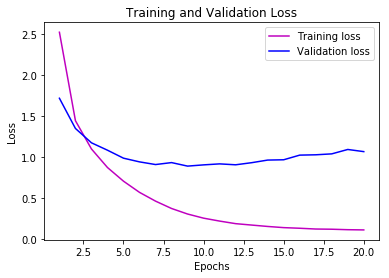

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(loss) +1)

plt.plot(epochs, loss , 'm' , label='Training loss')
plt.plot(epochs, val_loss , 'b' , label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

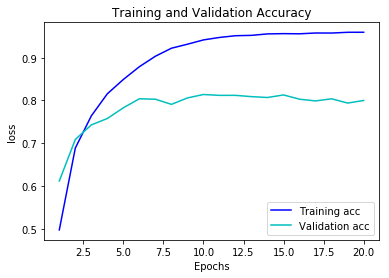

In [0]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs , acc , 'b' , label='Training acc')
plt.plot(epochs , val_acc , 'c' , label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [0]:
#Retrain a model from Scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu' , input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46 , activation='softmax'))

model.compile(optimizer='rmsprop' ,
             loss= 'categorical_crossentropy' , 
             metrics=['accuracy'])

model.fit(partial_x_train , 
         partial_y_train, 
         epochs = 6, 
         batch_size= 512,
         validation_data = (x_val , y_val))

results= model.evaluate(x_test , one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/6
7982/7982 [==============================] - 1s 177us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/6
7982/7982 [==============================] - 1s 148us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/6
7982/7982 [==============================] - 1s 150us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/6
7982/7982 [==============================] - 1s 149us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/6
7982/7982 [==============================] - 1s 146us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/6
2246/2246 [==============================] - 1s 263us/step


In [0]:
results

[0.9999365004066474, 0.7760463045944832]

In [0]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.18521816562778273

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[0].shape

(46,)

In [0]:
np.sum(predictions[0])

1.0000001

In [0]:
np.argmax(predictions[0])

3

In [0]:
#Anothermodel


model = models.Sequential()
model.add(layers.Dense(128, activation='relu' , input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop' ,
             loss= 'sparse_categorical_crossentropy' , 
             metrics=['accuracy'])

model.fit(partial_x_train , 
         partial_y_train, 
         epochs = 6, 
         batch_size= 512,
         validation_data = (x_val, y_val))

results= model.evaluate(x_test , one_hot_test_labels)

ValueError: ignored